# Own parameterised AI - analyse results

Extracts and visualises results from 02_own_parameterised_ai_results_01_raw.csv.

In [1]:
from datetime import datetime
import pandas as pd
import plotly.express as px
import numpy as np

In [7]:
df = pd.read_csv('02_own_parameterised_ai_results_01_raw.csv', parse_dates=[2])

In [49]:
df = pd.read_csv('02_own_parameterised_ai_results_01_raw.csv', parse_dates=[2])
df_to_group = df.groupby(['max_buses', 'date'])
df_mean_standard_deviation = pd.concat([
    df_to_group.agg('mean')['money'].rename('mean'),
    df_to_group.agg('std')['money'].rename('standard_deviation'),
], axis=1).stack().unstack(level=2).unstack(level=0)
df_mean_standard_deviation.columns.set_names(['statistic', 'max_buses'], inplace=True)
df_mean_standard_deviation.to_csv('02_own_parameterised_ai_results_02_mean_standard_deviation.csv')

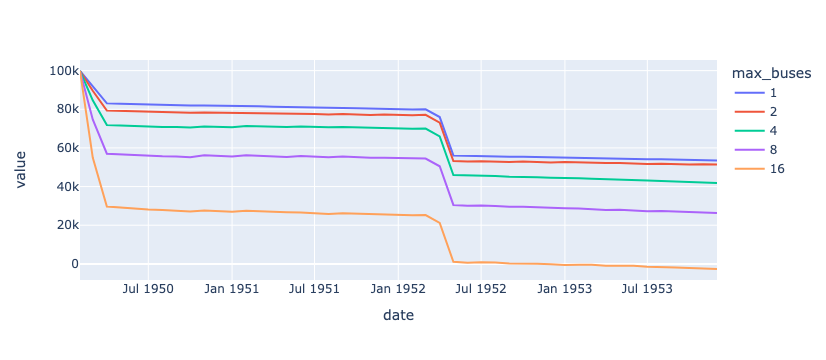

In [58]:
px.line(df_mean_standard_deviation["mean"])